In [1]:
import numpy as np
import matplotlib.pyplot as plt
import ctypes
from array import array
photlib = ctypes.CDLL("./c_src/cwrapper.so")
fortran = ctypes.CDLL("./c_src/fwrapper.so")

In [2]:
def flux(c1, c2, rp, rm, bp, bpm, theta):
    
    bp = (ctypes.c_double * len(bp)).from_buffer(bp)
    bpm = (ctypes.c_double * len(bpm)).from_buffer(bpm)
    theta = (ctypes.c_double * len(theta)).from_buffer(theta)
    lc = ((ctypes.c_double * 8) * len(bp)).from_buffer(np.zeros((8, len(bp))))
    rp = ctypes.c_double(rp)
    rm = ctypes.c_double(rm)
    c1 = ctypes.c_double(c1)
    c2 = ctypes.c_double(c2)
    j = ctypes.c_int(len(bp))
    photlib.LC.restype = None
    photlib.LC(c1, c2, rp, rm, bp, bpm, theta, lc, j)
    return np.array(lc)

def coords(t, ms, t0p, ep, Pp, Op, wp, ip, mp, t0m, em, Pm, Om, wm, im, mm):
    
    photlib.system_coords.restype = None
    j = len(t)
    
    xs = (ctypes.c_double * len(t)).from_buffer(np.zeros(j))
    ys = (ctypes.c_double * len(t)).from_buffer(np.zeros(j))
    zs = (ctypes.c_double * len(t)).from_buffer(np.zeros(j))
    xp = (ctypes.c_double * len(t)).from_buffer(np.zeros(j))
    yp = (ctypes.c_double * len(t)).from_buffer(np.zeros(j))
    zp = (ctypes.c_double * len(t)).from_buffer(np.zeros(j))
    xm = (ctypes.c_double * len(t)).from_buffer(np.zeros(j))
    ym = (ctypes.c_double * len(t)).from_buffer(np.zeros(j))
    zm = (ctypes.c_double * len(t)).from_buffer(np.zeros(j))
    t = (ctypes.c_double * len(t)).from_buffer(t)
    j = ctypes.c_int(j)
    
    ms = ctypes.c_double(ms)
    t0p = ctypes.c_double(t0p)
    ep = ctypes.c_double(ep)
    Pp = ctypes.c_double(Pp)
    Op = ctypes.c_double(Op)
    wp = ctypes.c_double(wp)
    ip = ctypes.c_double(ip)
    mp = ctypes.c_double(mp)
    t0m = ctypes.c_double(t0m)
    em = ctypes.c_double(em)
    Pm = ctypes.c_double(Pm)
    Om = ctypes.c_double(Om)
    wm = ctypes.c_double(wm)
    im = ctypes.c_double(im)
    mm = ctypes.c_double(mm)
    
    photlib.system_coords(t, ms, t0p, ep, Pp, Op, wp, ip, mp, t0m, em, Pm, Om, wm, im, mm, j, xs, ys, zs, xp, yp, zp, xm, ym, zm)
    return np.array(xs), np.array(ys), np.array(zs), np.array(xp), np.array(yp), np.array(zp), np.array(xm), np.array(ym), np.array(zm)

def impacts(t, ms, t0p, ep, Pp, Op, wp, ip, mp, t0m, em, Pm, Om, wm, im, mm):
    
    photlib.system_impacts.restype = None
    j = len(t)
    
    bp2 = (ctypes.c_double * j).from_buffer(np.zeros(j))
    bm2 = (ctypes.c_double * j).from_buffer(np.zeros(j))
    bpm2 = (ctypes.c_double * j).from_buffer(np.zeros(j))
    x = (ctypes.c_double * j).from_buffer(np.zeros(j))
    y = (ctypes.c_double * j).from_buffer(np.zeros(j))
    xbc = (ctypes.c_double * j).from_buffer(np.zeros(j))
    ybc = (ctypes.c_double * j).from_buffer(np.zeros(j))
    t = (ctypes.c_double * j).from_buffer(t)
    j = ctypes.c_int(j)
    
    ms = ctypes.c_double(ms)
    t0p = ctypes.c_double(t0p)
    ep = ctypes.c_double(ep)
    Pp = ctypes.c_double(Pp)
    Op = ctypes.c_double(Op)
    wp = ctypes.c_double(wp)
    ip = ctypes.c_double(ip)
    mp = ctypes.c_double(mp)
    t0m = ctypes.c_double(t0m)
    em = ctypes.c_double(em)
    Pm = ctypes.c_double(Pm)
    Om = ctypes.c_double(Om)
    wm = ctypes.c_double(wm)
    im = ctypes.c_double(im)
    mm = ctypes.c_double(mm)
    
    photlib.system_impacts(t, ms, t0p, ep, Pp, Op, wp, ip, mp, t0m, em, Pm, Om, wm, im, mm, j, x, y, xbc, ybc, bp2, bm2, bpm2)
    return np.array(bp2), np.array(bm2), np.array(bpm2)

In [3]:
t = np.linspace(79.3, 80.0, 100000)
ms = ac.M_sun.value / ac.M_earth.value

t0p = 0
ep = 0.1
Pp = 365
Op = 30 * np.pi / 180
wp = 0.0 * np.pi / 180
ip = 1 * np.pi / 2
mp = 10.0

t0m = -1.4
em = 0.2
Pm = 1
Om = 80 * np.pi / 180
wm = 10.0 * np.pi / 180
im = 90 * np.pi / 180
mm = 5.0

# no moon transit using these parameters 
#t0m = 20
#em = 0.2
#Pm = 40
#Om = 80 * np.pi / 180
#wm = 10.0 * np.pi / 180
#im = 0 * np.pi / 180
#mm = 1.0

# no overlap using these parameters
#t0m = 2
#em = 0.2
#Pm = 5
#Om = 80 * np.pi / 180
#wm = 10.0 * np.pi / 180
#im = 0 * np.pi / 180
#mm = 5.0

%time bp2, bm2, bpm2 = impacts(t, ms, t0p, ep, Pp, Op, wp, ip, mp, t0m, em, Pm, Om, wm, im, mm)
xs, ys, zx, xp, yp, zp, xm, ym, zm = coords(t, ms, t0p, ep, Pp, Op, wp, ip, mp, t0m, em, Pm, Om, wm, im, mm)

xp *= (ac.au.value / ac.R_sun.value)
yp *= (ac.au.value / ac.R_sun.value)
zp *= (ac.au.value / ac.R_sun.value)
xm *= (ac.au.value / ac.R_sun.value)
ym *= (ac.au.value / ac.R_sun.value)
zm *= (ac.au.value / ac.R_sun.value)

bp2 *= (ac.au.value / ac.R_sun.value)**2
bm2 *= (ac.au.value / ac.R_sun.value)**2
bpm2 *= (ac.au.value / ac.R_sun.value)**2

bp = np.sqrt(bp2)
bm = np.sqrt(bm2)
bpm = np.sqrt(bpm2)
theta = np.zeros_like(bp)

for i, (bpi, bpmi, bmi) in enumerate(zip(bp, bpm, bm)):
    a, b, c = bpi, bpmi, bmi
    if b > a : 
        tmp = b
        b = a
        a = tmp
    if c > b :
        tmp = c
        c = b
        b = tmp
    if b > a :
        tmp = b
        b = a
        a = tmp
    delta = np.sqrt((a + (b + c)) * (c - (a - b)) * (c + (a - b)) * (a + (b - c)))
    theta[i] = np.arctan2(delta, (bpi - bmi) * (bpi + bmi) + bpmi * bpmi)

CPU times: user 15.7 ms, sys: 6.09 ms, total: 21.8 ms
Wall time: 23 ms


(-5e-17, 5e-17)

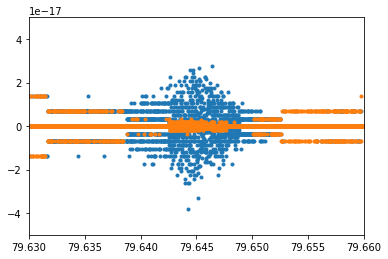

In [4]:
#plt.plot(t, bm, '-')
plt.plot(t, bm - np.sqrt(bp * bp + bpm * bpm - 2 * bp * bpm * np.cos(theta)), '.')
plt.plot(t, bm - np.sqrt((bp - bpm)**2 + 4 * bp * bpm * np.sin(theta * 0.5)**2), '.')
plt.xlim(79.63, 79.66)
plt.ylim(-0.5e-16, 0.5e-16)

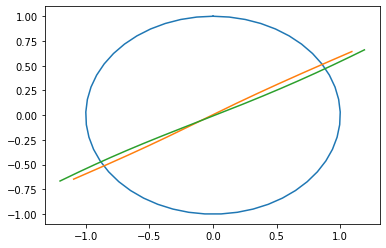

In [5]:
plt.plot(np.sin(np.linspace(0, 2 * np.pi)), np.cos(np.linspace(0, 2 * np.pi)))
plt.plot(xp, yp)
plt.plot(xm, ym)

CPU times: user 36.6 ms, sys: 5.32 ms, total: 41.9 ms
Wall time: 53.6 ms


(-0.00075, 0.0001)

<Figure size 864x720 with 0 Axes>

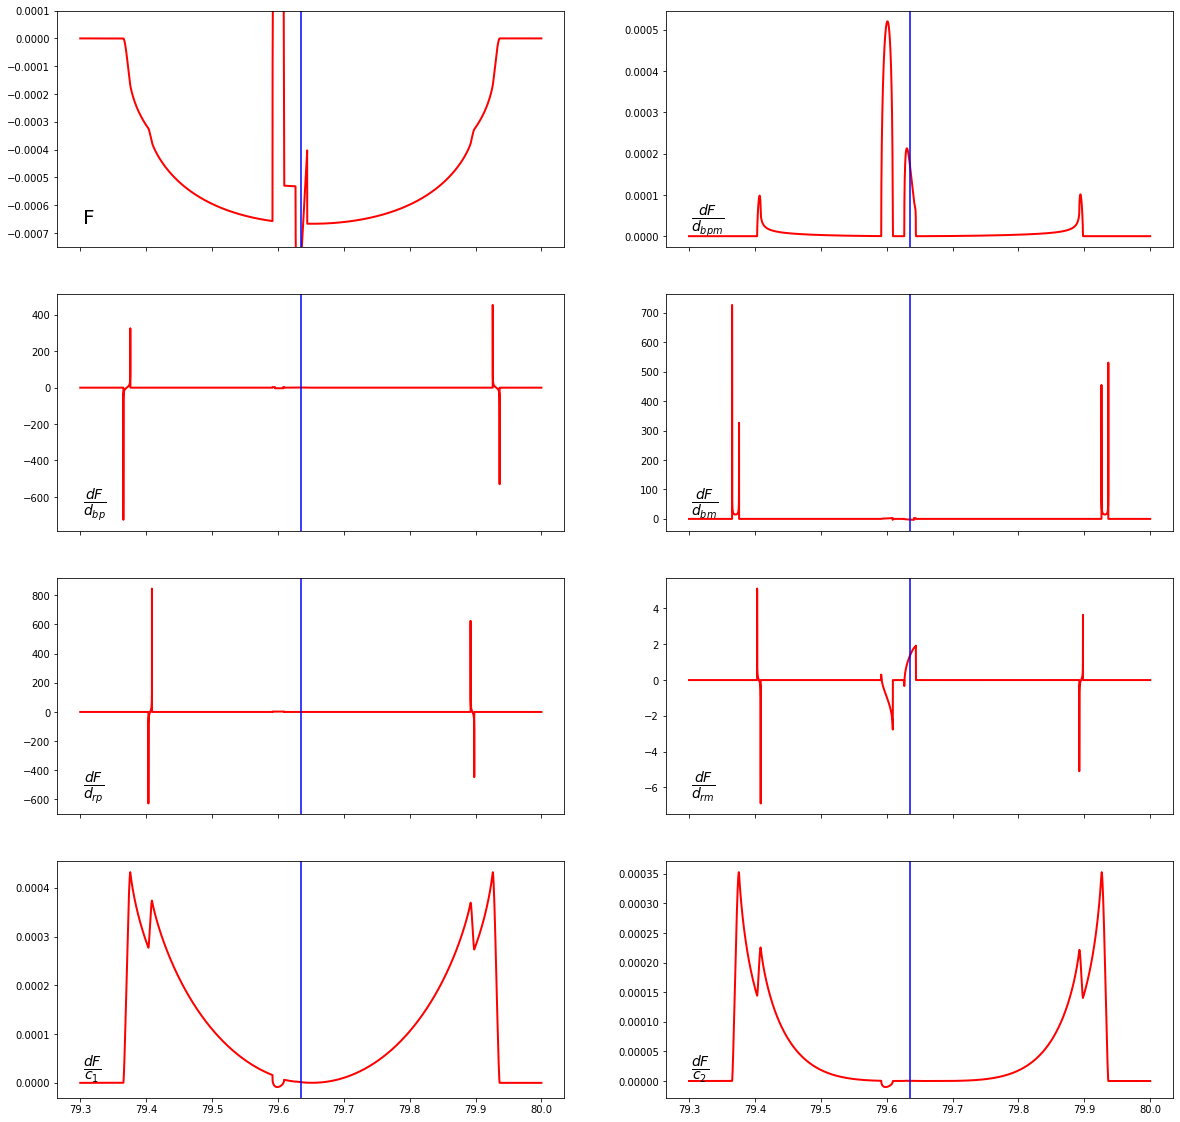

In [6]:
plt.figure(figsize=(12, 10))
rp = 0.02
rm = 0.01
%time lc_combined_ld = flux(0.6, 0.3, rp, rm, bp, bpm, theta)

mark = '-'
fig, axs = plt.subplots(4, 2, figsize=(20, 20), sharex=True)
axs[0, 0].plot(t, lc_combined_ld[:, 0], mark, color='r', linewidth=2)
axs[0, 0].annotate('F', (0.05, 0.1), xycoords='axes fraction', fontsize=20)

axs[1, 0].plot(t, lc_combined_ld[:, 1], mark, color='r', linewidth=2) # bp
axs[1, 0].annotate(r'$\frac{dF}{d_{bp}}$', (0.05, 0.1), xycoords='axes fraction', fontsize=20)

axs[2, 0].plot(t, lc_combined_ld[:, 2], mark, color='r', linewidth=2) # rp
axs[2, 0].annotate(r'$\frac{dF}{d_{rp}}$', (0.05, 0.1), xycoords='axes fraction', fontsize=20)

axs[1, 1].plot(t, lc_combined_ld[:, 3], mark, color='r', linewidth=2) # bm
axs[1, 1].annotate(r'$\frac{dF}{d_{bm}}$', (0.05, 0.1), xycoords='axes fraction', fontsize=20)

axs[2, 1].plot(t, lc_combined_ld[:, 4], mark, color='r', linewidth=2) # rm
axs[2, 1].annotate(r'$\frac{dF}{d_{rm}}$', (0.05, 0.1), xycoords='axes fraction', fontsize=20)

axs[0, 1].plot(t, lc_combined_ld[:, 5], mark, color='r', linewidth=2) # bpm
axs[0, 1].annotate(r'$\frac{dF}{d_{bpm}}$', (0.05, 0.1), xycoords='axes fraction', fontsize=20)

axs[3, 0].plot(t, lc_combined_ld[:, 6], mark, color='r', linewidth=2) # c1
axs[3, 0].annotate(r'$\frac{dF}{c_{1}}$', (0.05, 0.1), xycoords='axes fraction', fontsize=20)

axs[3, 1].plot(t, lc_combined_ld[:, 7], mark, color='r', linewidth=2) # c2
axs[3, 1].annotate(r'$\frac{dF}{c_{2}}$', (0.05, 0.1), xycoords='axes fraction', fontsize=20)

#[ax.set_ylim(-0.01, 0.01) for ax in axs.flatten()]
#[ax.set_xlim(79.86, 79.92) for ax in axs.flatten()]
[ax.axvline(79.635, color='b') for ax in axs.flatten()]
#[ax.axvline(79.881, color='b') for ax in axs.flatten()]
axs[0, 0].set_ylim(-0.00075, 0.0001)
#axs[0, 0].set_xlim(79.3, 79.4)

In [ ]:
t0 = 79.635
lc = lc_combined_ld
i = np.where(np.isclose(t, t0, atol=np.min(np.diff(t)), rtol=0.0))[0][0]
print(i)

xp0, yp0 = bp[i], 0.0
xm0, ym0 = xp0 + bpm[i] * np.cos(np.pi - theta[i]), yp0 + bpm[i] * np.sin(np.pi - theta[i])
#xm0, ym0 = np.sqrt(bm2[i]), 0.0
#theta = np.arccos((bp[i]**2 + bm[i]**2 - bpm[i]**2) / (2 * bp[i] * bm[i]))
#xp0, yp0 = bp[i] * np.cos(theta[i]), bp[i] * np.sin(theta)

plt.figure(figsize=(10, 10))
phi = np.linspace(0, 2 * np.pi, 1000)

plt.plot(np.cos(phi), np.sin(phi), color='k')
plt.plot(xp0 + rp * np.cos(phi), yp0 + rp * np.sin(phi), color='r')
plt.plot(xm0 + rm * np.cos(phi), ym0 + rm * np.sin(phi), color='b')

plt.plot(xp0 + rp * np.cos(np.pi + lc[i][1]), yp0 + rp * np.sin(np.pi + lc[i][1]), 'mo')
plt.plot(xp0 + rp * np.cos(np.pi + lc[i][2]), yp0 + rp * np.sin(np.pi + lc[i][2]), 'm.')
plt.plot(xm0 + rm * np.cos(np.pi + lc[i][3]), ym0 + rm * np.sin(np.pi + lc[i][3]), 'go')
plt.plot(xm0 + rm * np.cos(np.pi + lc[i][4]), ym0 + rm * np.sin(np.pi + lc[i][4]), 'g.')

#dphi = 0.0055
#plt.plot(np.cos(lc[i][1] + dphi), np.sin(lc[i][1] + dphi), 'go')
#plt.plot(np.cos(-lc[i][1] + dphi), np.sin(-lc[i][1] + dphi), 'go')
plt.plot(0, 0, 'k.')

plt.ylim(-1.5, 1.5)
plt.xlim(-1.5, 1.5)

boxsize = 0.03
boxcenter = (0.05, -0.005)
plt.xlim(boxcenter[0]-boxsize, boxcenter[0]+boxsize)
plt.ylim(boxcenter[1]-boxsize, boxcenter[1]+boxsize)

In [ ]:
theta[i] / np.pi

In [ ]:
print(np.sum(np.isnan(lc_combined_ld)))

In [ ]:
plt.plot(t, bp)
i = np.where(np.isclose(bp, rp, atol=2*np.min(np.diff(t)), rtol=0.0))[0][0]
plt.axvline(t[i])
plt.axhline(rp)

In [ ]:
lc_combined_ld_point = flux(0.6, 0.0, rp, rm, np.array([rp]), np.array([bm[i]]), np.array([bpm[i]]))
lc_combined_ld = flux(0.6, 0.0, rp, rm, bp, bm, bpm)

mark = '-'
fig, axs = plt.subplots(4, 2, figsize=(20, 20), sharex=True)
axs[0, 0].plot(t, lc_combined_ld[:, 0], mark, color='r', linewidth=2)
axs[0, 0].plot(t[i], lc_combined_ld_point[:, 0], 'o', color='b', linewidth=2)
axs[0, 0].annotate('F', (0.05, 0.1), xycoords='axes fraction', fontsize=20)

axs[1, 0].plot(t, lc_combined_ld[:, 1], mark, color='r', linewidth=2) # bp
axs[1, 0].plot(t[i], lc_combined_ld_point[:, 1], 'o', color='b', linewidth=2)
axs[1, 0].annotate(r'$\frac{dF}{d_{bp}}$', (0.05, 0.1), xycoords='axes fraction', fontsize=20)

axs[2, 0].plot(t, lc_combined_ld[:, 2], mark, color='r', linewidth=2) # rp
axs[2, 0].plot(t[i], lc_combined_ld_point[:, 2], 'o', color='b', linewidth=2)
axs[2, 0].annotate(r'$\frac{dF}{d_{rp}}$', (0.05, 0.1), xycoords='axes fraction', fontsize=20)

axs[1, 1].plot(t, lc_combined_ld[:, 3], mark, color='r', linewidth=2) # bm
axs[1, 1].plot(t[i], lc_combined_ld_point[:, 3], 'o', color='b', linewidth=2)
axs[1, 1].annotate(r'$\frac{dF}{d_{bm}}$', (0.05, 0.1), xycoords='axes fraction', fontsize=20)

axs[2, 1].plot(t, lc_combined_ld[:, 4], mark, color='r', linewidth=2) # rm
axs[2, 1].plot(t[i], lc_combined_ld_point[:, 4], 'o', color='b', linewidth=2)
axs[2, 1].annotate(r'$\frac{dF}{d_{rm}}$', (0.05, 0.1), xycoords='axes fraction', fontsize=20)

axs[0, 1].plot(t, lc_combined_ld[:, 5], mark, color='r', linewidth=2) # bpm
axs[0, 1].plot(t[i], lc_combined_ld_point[:, 5], 'o', color='b', linewidth=2)
axs[0, 1].annotate(r'$\frac{dF}{d_{bpm}}$', (0.05, 0.1), xycoords='axes fraction', fontsize=20)

axs[3, 0].plot(t, lc_combined_ld[:, 6], mark, color='r', linewidth=2) # c1
axs[3, 0].plot(t[i], lc_combined_ld_point[:, 6], 'o', color='b', linewidth=2)
axs[3, 0].annotate(r'$\frac{dF}{c_{1}}$', (0.05, 0.1), xycoords='axes fraction', fontsize=20)

axs[3, 1].plot(t, lc_combined_ld[:, 7], mark, color='r', linewidth=2) # c2
axs[3, 1].plot(t[i], lc_combined_ld_point[:, 7], 'o', color='b', linewidth=2)
axs[3, 1].annotate(r'$\frac{dF}{c_{2}}$', (0.05, 0.1), xycoords='axes fraction', fontsize=20)

In [ ]:
#rp = 0.1
drp = 0.00000001
flux_rp = flux(0.6, 0.3, rp, rm, bp, bm, bpm)
flux_rp_plus_drp = flux(0.6, 0.3, rp + drp, rm, bp, bm, bpm)
flux_rp_minus_drp = flux(0.6, 0.3, rp - drp, rm, bp, bm, bpm)

plt.figure(figsize=(8, 8))
plt.plot(t, flux_rp[:, 2], '-', color='r', linewidth=2)
plt.plot(t, (flux_rp_plus_drp[:, 0] - flux_rp_minus_drp[:, 0])/(2*drp))
#plt.ylim(-0.3, 0.001)
#plt.xlim(79.86, 79.88)

In [ ]:
#rm = 0.05
drm = 0.0001
flux_rm = flux(0.6, 0.0, rp, rm, bp, bm, bpm)
flux_rm_plus_drm = flux(0.6, 0.0, rp, rm+drm, bp, bm, bpm)
flux_rm_minus_drm = flux(0.6, 0.0, rp, rm-drm, bp, bm, bpm)

plt.figure(figsize=(8, 8))
plt.plot(t, flux_rm[:, 4], '-', color='r', linewidth=2)
plt.plot(t, (flux_rm_plus_drm[:, 0] - flux_rm_minus_drm[:, 0])/(2*drm))

In [ ]:
dbp = 0.00000001
bpp = bp + dbp
bpm = bp - dbp
flux_rp = flux(0.6, 0.3, rp, rm, bp, bm, bpm)
flux_rp_plus_drp = flux(0.6, 0.3, rp, rm, bpp, bm, bpm)
flux_rp_minus_drp = flux(0.6, 0.3, rp, rm, bpm, bm, bpm)

plt.figure(figsize=(8, 8))
plt.plot(t, flux_rp[:, 1], '-', color='r', linewidth=2)
plt.plot(t, (flux_rp_plus_drp[:, 0] - flux_rp_minus_drp[:, 0])/(2*dbp))
plt.ylim(-0.001, 0.02)
#plt.xlim(79.9, 79.92)

In [ ]:
dbm = 0.00000001
bmp = bm + dbm
bmm = bm - dbm
flux_rp = flux(0.6, 0.3, rp, rm, bp, bm, bpm)
flux_rp_plus_drm = flux(0.6, 0.3, rp, rm, bp, bmp, bpm)
flux_rp_minus_drm = flux(0.6, 0.3, rp, rm, bp, bmm, bpm)

plt.figure(figsize=(8, 8))
plt.plot(t, flux_rp[:, 3], '-', color='r', linewidth=2)
plt.plot(t, (flux_rp_plus_drm[:, 0] - flux_rp_minus_drm[:, 0])/(2*dbm))

plt.ylim(-0.01, 0.01)

In [ ]:
# everything co-planar -- doesn't work yet. 

bp = np.linspace(-1.5, 1.5, 1000)
bm = np.linspace(-1.8, 1.8, 1000)
#bpm = np.sqrt((bp - bm)**2 + np.linspace(0, 0.01, 1000)**2)
bpm = bp - bm
t = np.linspace(0, 1, 1000)

bp2 = bp * bp
bm2 = bm * bm
bpm2 = bpm * bpm

plt.figure(figsize=(12, 10))
rp = 0.05
rm = 0.02
%time lc_combined_nold = flux(0.0, 0.0, rp, rm, bp2, bm2, bpm2)
%time lc_combined_ld = flux(0.6, 0.3, rp, rm, bp2, bm2, bpm2)

mark = '-'
fig, axs = plt.subplots(4, 2, figsize=(20, 20), sharex=True)
axs[0, 0].plot(t, lc_combined_ld[:, 0], mark, color='r', linewidth=2)
axs[0, 0].annotate('F', (0.05, 0.1), xycoords='axes fraction', fontsize=20)

axs[1, 0].plot(t, lc_combined_ld[:, 1], mark, color='r', linewidth=2) # bp
axs[1, 0].annotate(r'$\frac{dF}{d_{bp}}$', (0.05, 0.1), xycoords='axes fraction', fontsize=20)

axs[2, 0].plot(t, lc_combined_ld[:, 2], mark, color='r', linewidth=2) # rp
axs[2, 0].annotate(r'$\frac{dF}{d_{rp}}$', (0.05, 0.1), xycoords='axes fraction', fontsize=20)

axs[1, 1].plot(t, lc_combined_ld[:, 3], mark, color='r', linewidth=2) # bm
axs[1, 1].annotate(r'$\frac{dF}{d_{bm}}$', (0.05, 0.1), xycoords='axes fraction', fontsize=20)

axs[2, 1].plot(t, lc_combined_ld[:, 4], mark, color='r', linewidth=2) # rm
axs[2, 1].annotate(r'$\frac{dF}{d_{rm}}$', (0.05, 0.1), xycoords='axes fraction', fontsize=20)

axs[0, 1].plot(t, lc_combined_ld[:, 5], mark, color='r', linewidth=2) # bpm
axs[0, 1].annotate(r'$\frac{dF}{d_{bpm}}$', (0.05, 0.1), xycoords='axes fraction', fontsize=20)

axs[3, 0].plot(t, lc_combined_ld[:, 6], mark, color='r', linewidth=2) # c1
axs[3, 0].annotate(r'$\frac{dF}{c_{1}}$', (0.05, 0.1), xycoords='axes fraction', fontsize=20)

axs[3, 1].plot(t, lc_combined_ld[:, 7], mark, color='r', linewidth=2) # c2
axs[3, 1].annotate(r'$\frac{dF}{c_{2}}$', (0.05, 0.1), xycoords='axes fraction', fontsize=20)

In [ ]:
#rp = 0.1
drp = 0.00000001
flux_rp = flux(0.6, 0.3, rp, rm, bp2, bm2, bpm2)
flux_rp_plus_drp = flux(0.6, 0.3, rp + drp, rm, bp2, bm2, bpm2)
flux_rp_minus_drp = flux(0.6, 0.3, rp - drp, rm, bp2, bm2, bpm2)

plt.figure(figsize=(8, 8))
plt.plot(t, flux_rp[:, 2], '-', color='r', linewidth=2)
plt.plot(t, (flux_rp_plus_drp[:, 0] - flux_rp_minus_drp[:, 0])/(2*drp))

In [ ]:
dbp = 0.00000001
bp2p = (np.sqrt(bp2) + dbp)**2
bp2m = (np.sqrt(bp2) - dbp)**2
flux_rp = flux(0.6, 0.3, rp, rm, bp2, bm2, bpm2)
flux_rp_plus_drp = flux(0.6, 0.3, rp, rm, bp2p, bm2, bpm2)
flux_rp_minus_drp = flux(0.6, 0.3, rp, rm, bp2m, bm2, bpm2)

plt.figure(figsize=(8, 8))
plt.plot(t, flux_rp[:, 1], '-', color='r', linewidth=2)
plt.plot(t, (flux_rp_plus_drp[:, 0] - flux_rp_minus_drp[:, 0])/(2*dbp))

In [ ]:
t0 = 79.6
lc = lc_combined_ld
i = np.where(np.isclose(t, t0, atol=np.min(np.diff(t)), rtol=0.0))[0][0]
print(i)

xm0, ym0 = np.sqrt(bm2[i]), 0.0
theta = np.arccos((bp2m[i] + bm2[i] - bpm2[i]) / (2 * np.sqrt(bp2m[i] * bm2[i])))
xp0, yp0 = np.sqrt(bp2m[i]) * np.cos(theta), np.sqrt(bp2m[i]) * np.sin(theta)

plt.figure(figsize=(10, 10))
theta = np.linspace(0, 2 * np.pi, 1000)

plt.plot(np.cos(theta), np.sin(theta), color='k')
plt.plot(xp0 + rp * np.cos(theta), yp0 + rp * np.sin(theta), color='r')
plt.plot(xm0 + rm * np.cos(theta), ym0 + rm * np.sin(theta), color='b')

#plt.plot(xm0 + rm * np.cos(np.pi + lc[i][1]), ym0 + rm * np.sin(np.pi + lc[i][1]), 'go')
#plt.plot(xm0 + rm * np.cos(np.pi - lc[i]), ym0 + rm * np.sin(np.pi - lc[i]), 'go')
#plt.plot(xp0 + rp * np.cos(np.pi + lc[i][1]), yp0 + rp * np.sin(np.pi + lc[i][1]), 'go')
#plt.plot(xp0 + rp * np.cos(np.pi - lc[i]), yp0 + rp * np.sin(np.pi - lc[i]), 'go')
dphi = 0.0055
plt.plot(np.cos(lc[i][1] + dphi), np.sin(lc[i][1] + dphi), 'go')
plt.plot(np.cos(-lc[i][1] + dphi), np.sin(-lc[i][1] + dphi), 'go')
plt.plot(0, 0, 'k.')

plt.ylim(-1.5, 1.5)
plt.xlim(-1.5, 1.5)

boxsize = 1.5
boxcenter = (0.0, 0)
plt.xlim(boxcenter[0]-boxsize, boxcenter[0]+boxsize)
plt.ylim(boxcenter[1]-boxsize, boxcenter[1]+boxsize)

In [ ]:
print(np.sqrt(bpm2[i]) - rp)
print(np.sqrt(bpm2[i]) - rm)
print(np.sqrt(bpm2[i]) - rm - rp)
print((rm - rp) * (rm + rp) + bpm2[i])
print((np.sqrt(bpm2[i]) - rp) * (np.sqrt(bpm2[i]) + rp) + rm*rm)
print((rm - rp) * (rm + rp))
print(np.sqrt(bp2[i]) - rp)

In [ ]:
def intersection(r, b):
    
    if (b - r < 1) & (b + r > 1):
        theta = np.arccos((r**2 + b**2 - 1)/(2*r*b))
        phi = np.arccos((1 + b**2 - r**2)/(2*b))
    else:
        theta = 0.0
        phi = 0.0
    return theta, phi

In [ ]:
rp = 0.05
drp = 0.00001

intersections = np.array([intersection(rp, b) for b in np.sqrt(bp2)])
theta = intersections[:, 0]
phi = intersections[:, 1]

intersections_plus = np.array([intersection(rp + drp, b) for b in np.sqrt(bp2)])
theta_plus = intersections_plus[:, 0]
phi_plus = intersections_plus[:, 1]

intersections_minus = np.array([intersection(rp - drp, b) for b in np.sqrt(bp2)])
theta_minus = intersections_minus[:, 0]
phi_minus = intersections_minus[:, 1]

plt.plot(t, (theta_plus - theta_minus) / (2 * drp))
plt.plot(t, (phi_plus - phi_minus) / (2 * drp))
plt.ylim(-100, 100)

In [ ]:
plt.plot(t, lc_combined_ld[:, 2], '-', color='r', linewidth=2)
plt.plot(t, (theta_plus - theta_minus) / (2 * drp))
plt.ylim(-100, 100)
plt.xlim(79.38, 79.44)

In [ ]:
r = 0.04
b = 0.2
phi = np.linspace(0, 0.001, 1000)
plt.plot(phi, r * phi / (b * np.sin(phi) / 6))

In [ ]:
phi1 = np.float32(0.5)
phi2 = np.float32(0.5 + 1e-9)
(np.sin(3 * phi1) - phi1) - (np.sin(3 * phi2) - phi2)# - 9 * np.sin(phi)

In [ ]:
phi1 = np.float128(0.5)
phi2 = np.float128(0.5 + 1e-9)
(np.sin(3 * phi1) - phi1) - (np.sin(3 * phi2) - phi2)# - 9 * np.sin(phi)

In [ ]:
def Fq_r(phi, b, r):
    return (b * (b * (r * phi - (b * np.sin(phi)) / 6) 
        + r**2 * (np.sin(3 * phi) - 9 * np.sin(phi)) / 4) 
        + r**3 * (phi - np.sin(4 * phi) / 12))

def Fq_phi(phi, b, r):
    return -(r * (b * (2 * b**2 + 9 * r**2) * np.cos(phi)
        - 3 * r * (2 * b**2 + r**2 + b * r * np.cos(3 * phi)) + r**3 * np.cos(4 * phi))) / 12

In [ ]:
phi = np.float128(0.0)
dphi = np.float128(0.0001)
dr128 = Fq_r(phi, 0.1, 0.05) - Fq_r(phi + dphi, 0.1, 0.05)
dphi128 = Fq_phi(phi, 0.1, 0.05) - Fq_phi(phi + dphi, 0.1, 0.05)

In [ ]:
phi = np.float64(0.0)
dphi = np.float64(0.0001)
dr64 = Fq_r(phi, 0.1, 0.05) - Fq_r(phi + dphi, 0.1, 0.05)
dphi64 = Fq_phi(phi, 0.1, 0.05) - Fq_phi(phi + dphi, 0.1, 0.05)

In [ ]:
dr128 - dr64

In [ ]:
dphi128 - dphi64